## Homework 3

* Generate dataset using `make_classification` function in the sklearn.datasets class. Generate 10000 samples with 8 features (X) with one label (y). Also, use following parameters    
    * `n_informative` = 5
    *  `class_sep` = 2
    * `random_state` = 42
* Explore and analyse raw data.
* Do preprocessing for classification.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
* Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
# Generate dataset using make_classification function in the sklearn. 
# Convert it into pandas dataframe.
from sklearn.datasets import make_classification

data = make_classification(n_samples = 10000, n_features = 8)
df = pd.DataFrame(data[0])
df["target"] = data[1]
df

,0,1,2,3,4,5,6,7,target
0,0.815275,0.678368,0.403806,0.518489,1.094134,0.704289,-0.869127,2.053305,1
1,-1.249838,-0.373020,-0.853032,-0.897331,-0.740728,-1.214518,1.008857,0.936809,0
2,-2.173375,-1.052975,-0.752205,-0.912794,1.458935,-1.690660,2.765310,-0.562719,0
3,-1.181586,0.863282,-2.216931,0.597936,-1.377225,-1.960921,-0.996542,-1.200593,0
4,-0.896875,-0.530808,-2.066528,-2.588206,-0.418215,-1.709561,-1.287082,-0.021581,0
...,...,...,...,...,...,...,...,...,...
9995,-1.575785,0.520674,-0.672428,0.637150,0.075000,-1.299004,1.829289,0.283208,1
9996,1.044401,1.107725,0.937516,-0.514845,1.278273,1.144358,-0.532334,0.376043,1
9997,0.214600,-0.820574,-0.526092,0.797360,-1.110029,-0.178997,-1.103186,0.611105,0
9998,-1.079984,-0.805387,-0.393649,-0.240060,-0.604471,-0.851563,1.346655,0.776929,0


In [3]:
# Check duplicate values and missing data.
print(sum(df.duplicated()))

df.isnull().sum()


0


0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
target    0
dtype: int64

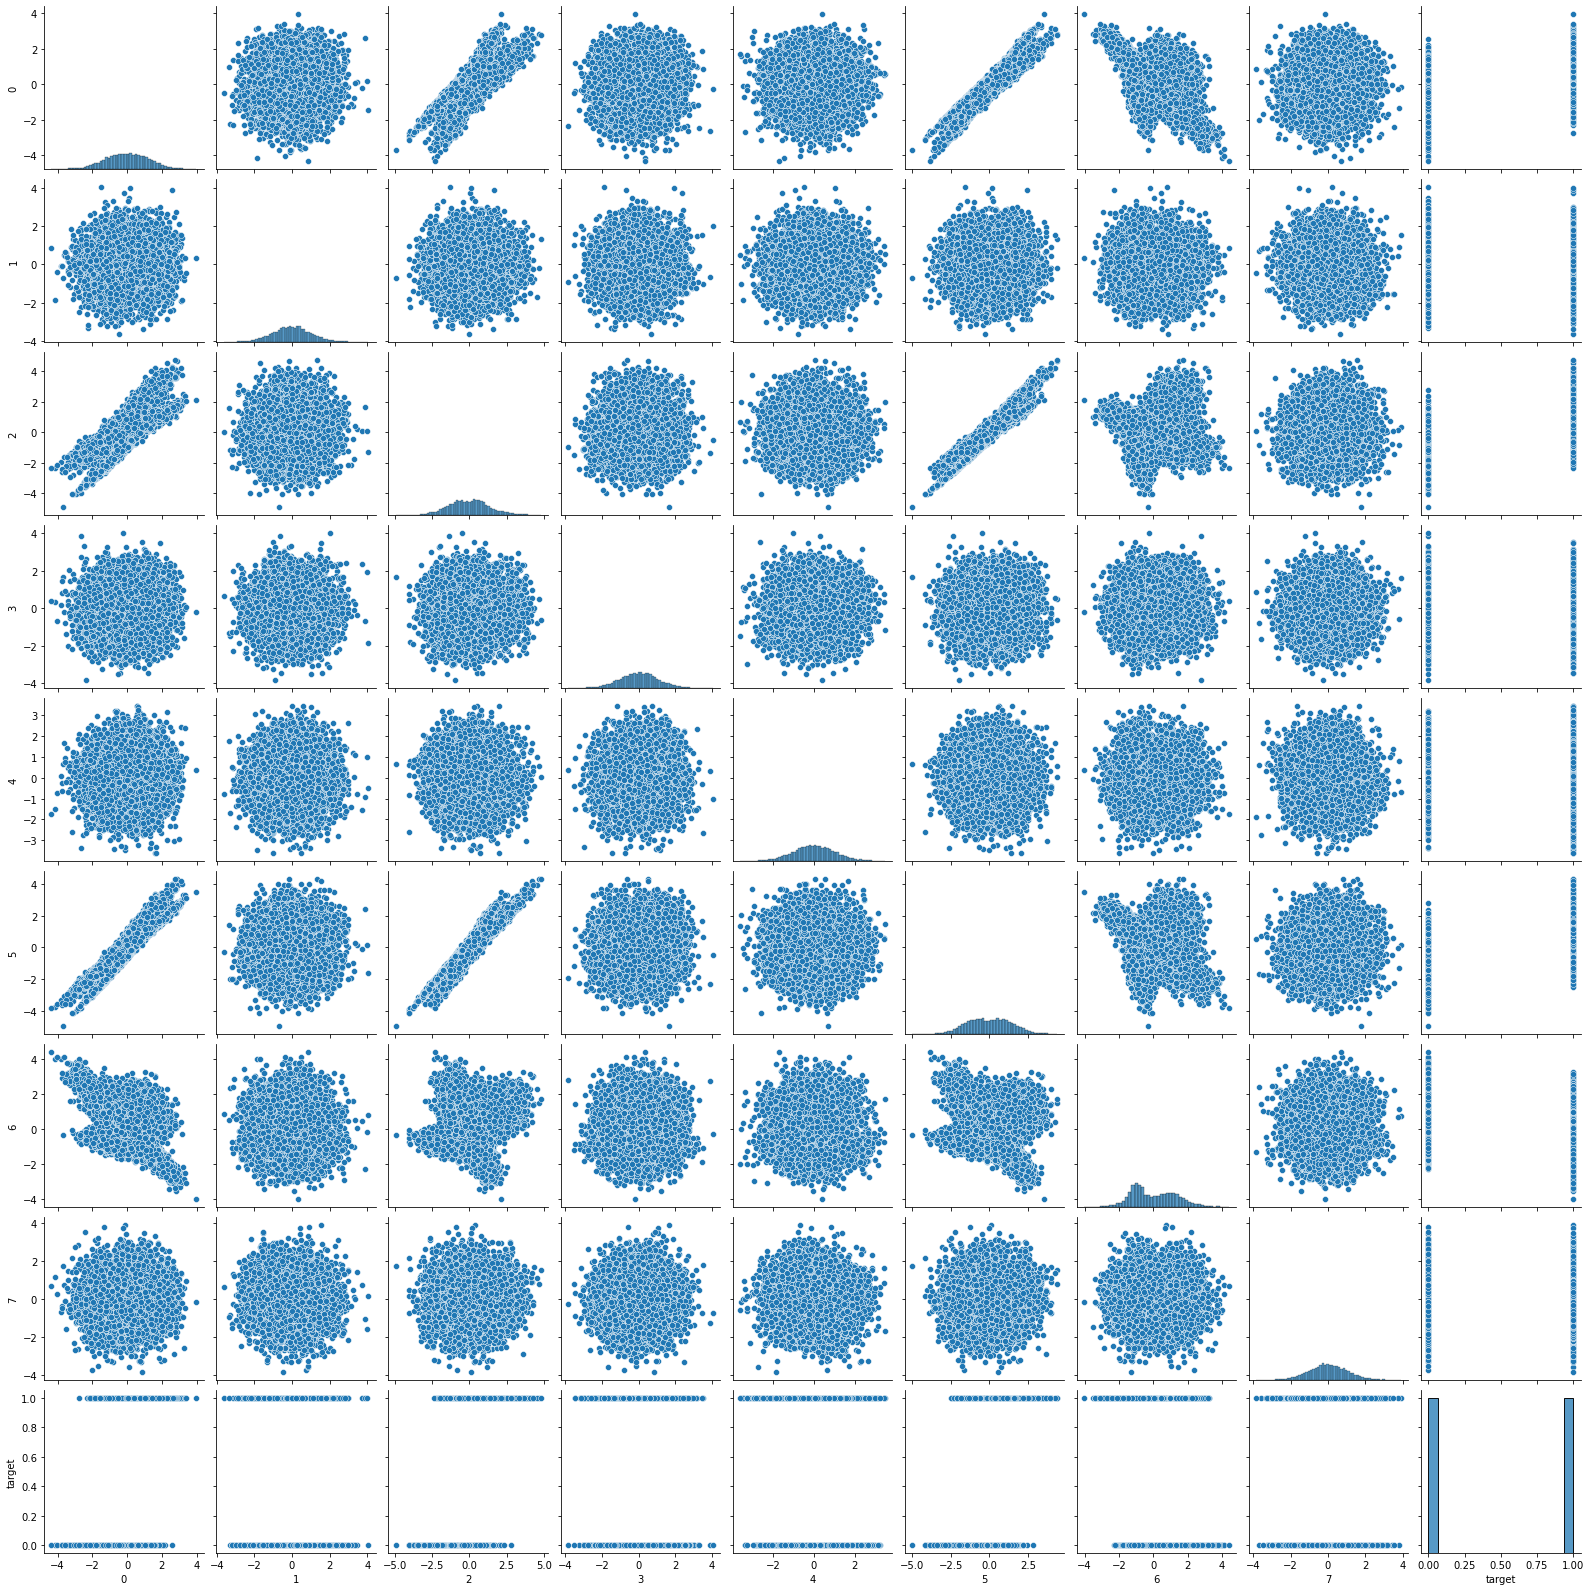

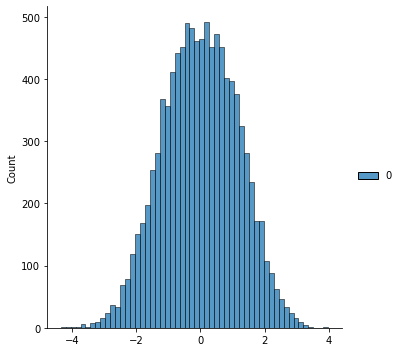

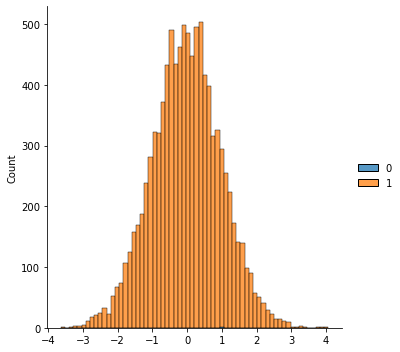

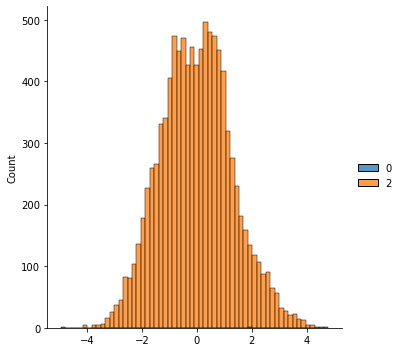

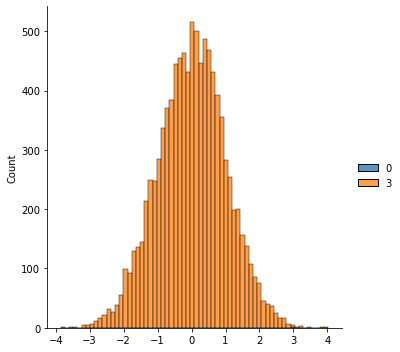

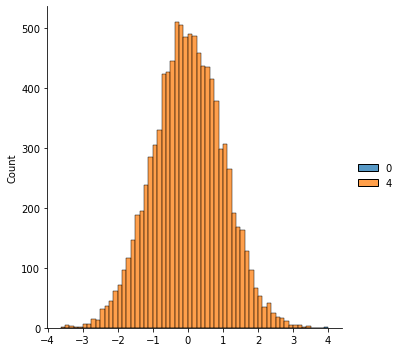

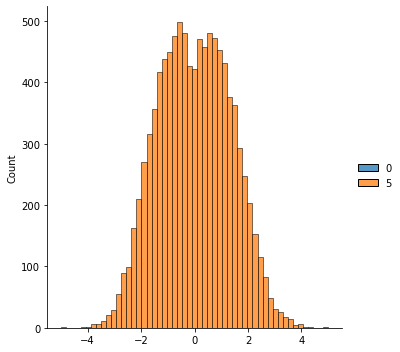

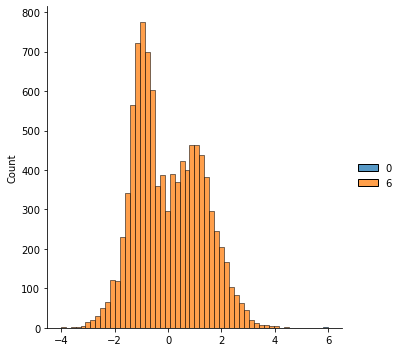

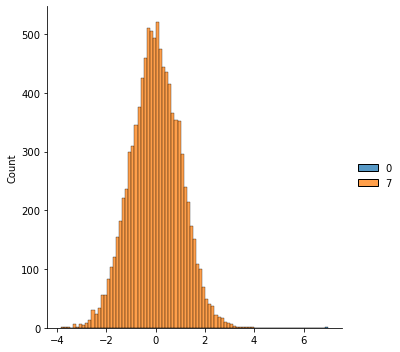

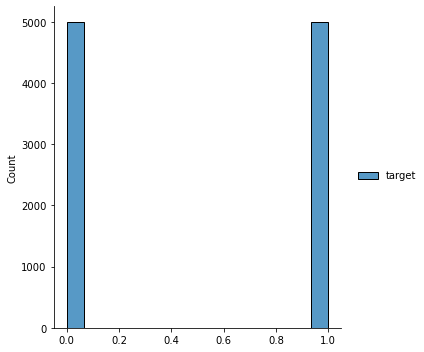

In [4]:
# Visualize data for each feature (pairplot,distplot).
sns.pairplot(df)
for column in df.iteritems():
    sns.displot(column)


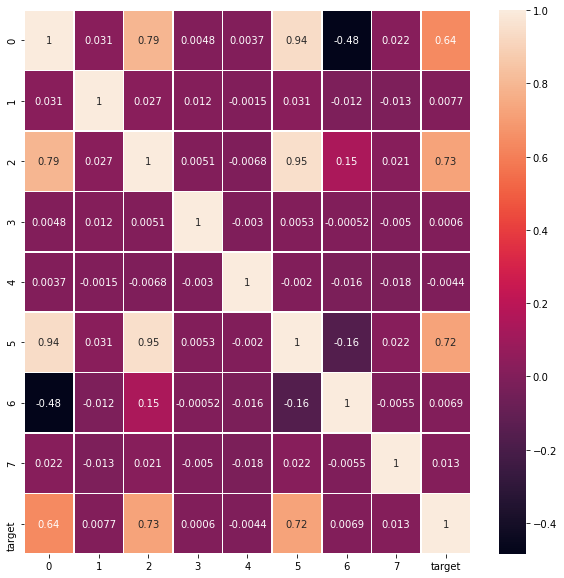

In [5]:
# Draw correlation matrix.

df.corr()

fig, w = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, linewidths=.5, ax=w) 

plt.show()

In [6]:
# Handle outliers (you can use IsolationForest, Z-score, IQR)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df = df[(df>Q1-1.5*IQR) & (df<Q3+1.5*IQR)].dropna()
df

0         1.676944
1         1.302708
2         1.767404
3         1.343276
4         1.347219
5         2.040915
6         2.005152
7         1.350051
target    1.000000
dtype: float64


,0,1,2,3,4,5,6,7,target
0,0.815275,0.678368,0.403806,0.518489,1.094134,0.704289,-0.869127,2.053305,1
1,-1.249838,-0.373020,-0.853032,-0.897331,-0.740728,-1.214518,1.008857,0.936809,0
2,-2.173375,-1.052975,-0.752205,-0.912794,1.458935,-1.690660,2.765310,-0.562719,0
3,-1.181586,0.863282,-2.216931,0.597936,-1.377225,-1.960921,-0.996542,-1.200593,0
4,-0.896875,-0.530808,-2.066528,-2.588206,-0.418215,-1.709561,-1.287082,-0.021581,0
...,...,...,...,...,...,...,...,...,...
9995,-1.575785,0.520674,-0.672428,0.637150,0.075000,-1.299004,1.829289,0.283208,1
9996,1.044401,1.107725,0.937516,-0.514845,1.278273,1.144358,-0.532334,0.376043,1
9997,0.214600,-0.820574,-0.526092,0.797360,-1.110029,-0.178997,-1.103186,0.611105,0
9998,-1.079984,-0.805387,-0.393649,-0.240060,-0.604471,-0.851563,1.346655,0.776929,0


In [23]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size= 0.3, random_state=2 )


In [102]:
# Import Decision Tree, define different hyperparamters and tune the algorithm.
from sklearn.tree import DecisionTreeClassifier


for d in [3,4,5,6,7,8]:
    print("for max_depth = ",d,", the score: ",DecisionTreeClassifier(max_depth = d, random_state= 42).fit(train_X, train_y).score(test_X, test_y), sep="")
    
# Best max_depth seems to be 5
print("*"*50)
for m in [3,4,5,6,7,8,9]:
    print("for min_samples_leaf = ",m,", the score: ",DecisionTreeClassifier(max_depth = 5,min_samples_leaf = m
                                                , random_state= 41).fit(train_X, train_y).score(test_X, test_y), sep="")
    
# min_samples_leaf made a slight difference; however, it is preferable to choose 6 for this parameter.
model = DecisionTreeClassifier(max_depth =5, min_samples_leaf = 6, random_state =41)
model.fit(train_X,train_y)

for max_depth = 3, the score: 0.8702290076335878
for max_depth = 4, the score: 0.8705759888965996
for max_depth = 5, the score: 0.8743927827897293
for max_depth = 6, the score: 0.8813324080499653
for max_depth = 7, the score: 0.8719639139486468
for max_depth = 8, the score: 0.8674531575294934
**************************************************
for min_samples_leaf = 3, the score: 0.8743927827897293
for min_samples_leaf = 4, the score: 0.8733518390006939
for min_samples_leaf = 5, the score: 0.8733518390006939
for min_samples_leaf = 6, the score: 0.8736988202637057
for min_samples_leaf = 7, the score: 0.8733518390006939
for min_samples_leaf = 8, the score: 0.8733518390006939
for min_samples_leaf = 9, the score: 0.8733518390006939


DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, random_state=41)

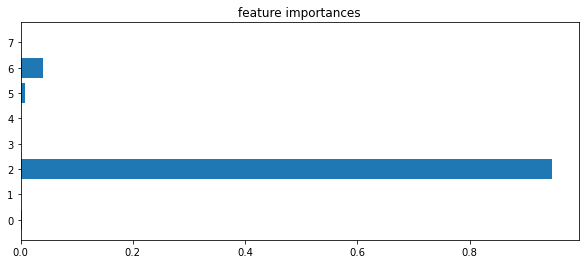

In [25]:
# Visualize feature importances.

plt.figure(figsize=(10, 4))
features = df.iloc[:,-1]
importances = model.feature_importances_
plt.title("feature importances")
plt.barh(range(8),importances[range(8)])

plt.show()



In [26]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
pred = model.predict(test_X)

print("Precision = ",precision_score(test_y, pred))
print("Recall = ",recall_score(test_y, pred))
print("Accuracy = ",accuracy_score(test_y, pred))
print("F1 Score =",f1_score(test_y, pred))



Precision =  0.8533685601056803
Recall =  0.900976290097629
Accuracy =  0.8736988202637057
F1 Score = 0.876526458616011


In [103]:
# Import XGBoostClassifier, define different hyperparamters and tune the algorithm.
import numpy as np
import xgboost as xgb
data_train = xgb.DMatrix(data=train_X, label=train_y)
data_test = xgb.DMatrix(data=test_X, label=test_y)
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}
model = xgb.train(param, data_train, 5)
preds = model.predict(data_test)
pred = np.asarray([np.argmax(line) for line in preds])


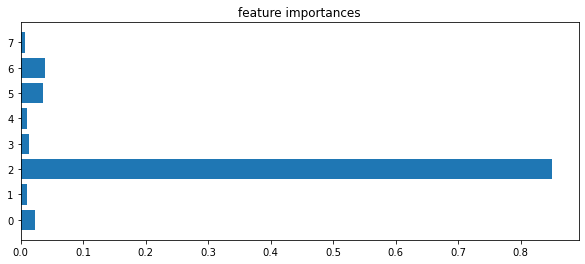

In [104]:
# Visualize feature importances.



plt.figure(figsize=(10, 4))
features = df.iloc[:,-1]
importances = model.get_score(importance_type="gain")
plt.title("feature importances")

y=list(importances.values())
x=list(importances.keys())

y=[int(i)/sum(y) for i in y]
x=[int(i) for i in x]

plt.barh(x,y)
plt.show()

Precision =  0.8712534059945504
Recall =  0.8919107391910739
Accuracy =  0.8806384455239417
F1 Score = 0.881461061337009


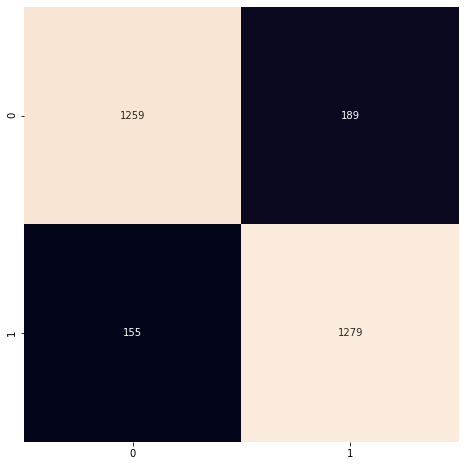

In [105]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
from sklearn.metrics import confusion_matrix

print("Precision = ",precision_score(test_y, pred))
print("Recall = ",recall_score(test_y, pred))
print("Accuracy = ",accuracy_score(test_y,pred))
print("F1 Score =",f1_score(test_y, pred))
plt.figure(figsize=(12, 8))
cm = confusion_matrix(test_y, pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False,fmt = ".0f")


##### Evaluate your result and select best performing algorithm for our case.
XGBClassifier gives us better results for precision, accuracy and F1 Score. However, Decision Tree Classifier does serve well in terms of recall and the gap between two algorithms are considerably small. Essentialy, with the advanced hyperparamter tuning on xgboost, we might end up with more accurate results.

